In [1]:
import glob,os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Input, Lambda, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
# matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

plt.rcParams["figure.figsize"] = (9,6)                  #changes width and height respectively
plt.rcParams.update({'font.size': 16})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import csv
import re
import cv2
import PIL
from PIL import Image
from numpy import asarray
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Model

# INPUT DATA

In [2]:
x = np.loadtxt("/home/tarak/Downloads/input")
dataframe_x = pd.DataFrame(x)

In [3]:
#dataframe_x.drop([3], axis = 1,inplace =True)
#dataframe_x.columns = range(dataframe_x.shape[1])
dataframe_x.iloc[39:78,3] =12
dataframe_x

,0,1,2,3,4
0,0.2,0.2,4.0,8.0,25.0
1,0.2,0.4,3.0,8.0,30.0
2,0.2,0.6,2.0,8.0,35.0
3,0.2,0.8,4.0,8.0,40.0
4,0.2,1.0,3.0,8.0,25.0
...,...,...,...,...,...
73,0.6,2.0,4.0,12.0,30.0
74,0.8,1.5,3.0,12.0,35.0
75,0.8,2.5,2.0,12.0,40.0
76,1.0,1.5,5.0,12.0,25.0


In [19]:
for i in range(0,5):
    print("Min Value",dataframe_x.iloc[:,i].min())
    print("Max Value",dataframe_x.iloc[:,i].max())
    print(50 *"--")

Min Value 0.05
Max Value 1.5
----------------------------------------------------------------------------------------------------
Min Value 0.1
Max Value 2.5
----------------------------------------------------------------------------------------------------
Min Value 2.0
Max Value 5.0
----------------------------------------------------------------------------------------------------
Min Value 8.0
Max Value 12.0
----------------------------------------------------------------------------------------------------
Min Value 25.0
Max Value 40.0
----------------------------------------------------------------------------------------------------


dataframe_x["5"]=""
dataframe_x

for i in range(0,78):
    if dataframe_x.iloc[i,3] == 8 and dataframe_x.iloc[i,4] == 25:
        dataframe_x.iloc[i,5] = 1.13
    if dataframe_x.iloc[i,3] == 8 and dataframe_x.iloc[i,4] == 30:
        dataframe_x.iloc[i,5] = 1.20
    if dataframe_x.iloc[i,3] == 8 and dataframe_x.iloc[i,4] == 35:
        dataframe_x.iloc[i,5] = 1.26
    if dataframe_x.iloc[i,3] == 8 and dataframe_x.iloc[i,4] == 40:
        dataframe_x.iloc[i,5] = 1.3
        
        
    if dataframe_x.iloc[i,3] == 12 and dataframe_x.iloc[i,4] == 25:
        dataframe_x.iloc[i,5] = 1.14
    if dataframe_x.iloc[i,3] == 12 and dataframe_x.iloc[i,4] == 30:
        dataframe_x.iloc[i,5] = 1.19
    if dataframe_x.iloc[i,3] == 12 and dataframe_x.iloc[i,4] == 35:
        dataframe_x.iloc[i,5] = 1.25
    if dataframe_x.iloc[i,3] == 12 and dataframe_x.iloc[i,4] == 40:
        dataframe_x.iloc[i,5] = 1.31  
        
dataframe_x.iloc[:,5] = dataframe_x.iloc[:,5]*2
dataframe_x.head()

dataframe_x.iloc[:,5] = dataframe_x.iloc[:,5]*dataframe_x.iloc[:,5]*dataframe_x.iloc[:,5]
dataframe_x.head()
dataframe_x.iloc[:,3] = dataframe_x.iloc[:,3]/dataframe_x.iloc[:,5]
dataframe_x

dataframe_x.drop(["5"], axis = 1,inplace =True)
dataframe_x.columns = range(dataframe_x.shape[1])
dataframe_x.head()

In [4]:
#dataframe_x.iloc[39:78,3] = 12
#dataframe_x.iloc[39:78,]

# OUTPUT DATA

In [5]:
%store -r y
print(y.shape)
y.resize(78,8)
y.shape

(80, 1, 1, 8)


ValueError: cannot resize this array: it does not own its data

In [31]:
dataframe_y= pd.DataFrame(y)
dataframe_y

,0,1,2,3,4,5,6,7
0,5.460919,0.000000,5.254953,0.0,4.073275,3.691249,1.227391,0.0
1,5.229622,0.000000,3.730321,0.0,7.456198,2.753277,0.525029,0.0
2,1.842435,0.000000,1.175847,0.0,9.099530,1.049718,0.000000,0.0
3,5.322944,1.164837,8.079970,0.0,3.648814,1.098083,1.975190,0.0
4,5.022484,0.000000,4.635832,0.0,6.184453,2.697393,0.781410,0.0
...,...,...,...,...,...,...,...,...
73,3.028821,2.345976,6.762326,0.0,1.358938,2.816864,3.491851,0.0
74,4.435791,0.000000,2.634323,0.0,2.440074,6.487766,1.396982,0.0
75,4.289775,0.000000,3.161737,0.0,8.166748,0.000000,0.000000,0.0
76,0.503178,3.764909,5.270681,0.0,0.000000,0.781078,1.700436,0.0


# NORMALISING DATA

In [32]:
scaler_x = StandardScaler()
dataframe_x = scaler_x.fit_transform(dataframe_x)
scaler_y = StandardScaler()
dataframe_y = scaler_y.fit_transform(dataframe_y)
print(dataframe_x.shape)
dataframe_y.shape

(78, 5)


(78, 8)

In [33]:
scaler2_x = MinMaxScaler()
dataframe_x = scaler2_x.fit_transform(dataframe_x)
scaler2_y = MinMaxScaler()
dataframe_y = scaler2_y.fit_transform(dataframe_y)
print(dataframe_x.shape)
dataframe_y.shape

(78, 5)


(78, 8)

In [34]:
dataframe_x = pd.DataFrame(dataframe_x)
dataframe_y = pd.DataFrame(dataframe_y)
#dataframe_y

# TEST_TRAIN SPLIT

In [6]:
train_x, test_x, train_y, test_y =train_test_split(dataframe_x , dataframe_y , test_size = 0.2, random_state = 42, shuffle = True)

NameError: name 'dataframe_y' is not defined

In [36]:
test_y

,0,1,2,3,4,5,6,7
33,0.000000,0.358471,0.624474,0.0,0.174505,0.219387,0.417167,0.0
0,0.893614,0.000000,0.617553,0.0,0.446109,0.483636,0.206168,0.0
34,0.433893,0.220886,0.730051,0.0,0.150512,0.416190,0.590400,0.0
12,0.617748,0.096178,0.646474,0.0,0.155428,0.641234,0.513372,0.0
10,0.815350,0.000000,0.267679,0.0,0.574688,0.536854,0.010974,0.0
77,0.156131,0.199007,0.432723,0.0,0.145728,0.538240,0.593112,0.0
30,0.661974,0.216051,0.991436,0.0,0.338368,0.014757,0.394776,0.0
4,0.821869,0.000000,0.544795,0.0,0.677327,0.353419,0.131256,0.0
49,0.828070,0.000000,0.206302,0.0,0.585829,0.687237,0.012605,0.0
66,0.536279,0.243037,0.835954,0.0,0.160194,0.237605,0.530595,0.0


In [37]:
index_values = test_y.index
%store index_values

Stored 'index_values' (Int64Index)


# RANDOM-FOREST 

In [38]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 35, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(train_x, train_y)

RandomForestRegressor(n_estimators=35, random_state=42)

# PREDICTIONS_ON_TRAIN_DATA

In [39]:
predictions_on_trained_data = regressor.predict(train_x)
mse = mean_squared_error(train_y, predictions_on_trained_data)
rmse = mse**.5
print('Mean squared error : ',mse)
print('Root mean square error :',rmse)

Mean squared error :  0.0024826309574249427
Root mean square error : 0.049826006838045354


# PREDICTIONS ON TEST_DATA

In [40]:
predictions = regressor.predict(test_x)
mse = mean_squared_error(test_y, predictions)
rmse = mse**.5
print('Mean squared error : ',mse)
print('Root mean square error :',rmse)

Mean squared error :  0.010447802681302779
Root mean square error : 0.10221449349922339


# R2_SCORES

In [41]:
r_squared = r2_score(train_y, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y, predictions)
print('R squared value on   test  data is', r_squared)

R squared value on trained data is 0.9692566269093268
R squared value on   test  data is 0.8219727063698226


<function matplotlib.pyplot.show(close=None, block=None)>

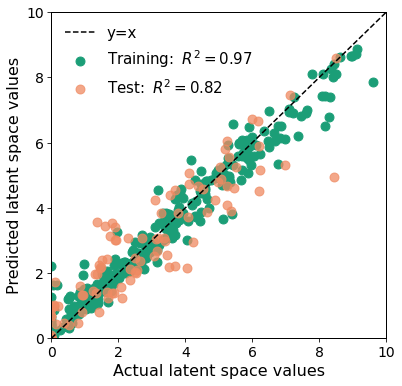

In [86]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 1

#plt.scatter(train_y.mean(axis =1), predictions_on_trained_data.mean(axis = 1),edgecolors='white',s = 70,label ='Training Score' )
#plt.scatter(test_y.mean(axis = 1), predictions.mean(axis = 1),color = '#ef8a62',edgecolors='white', s = 70,label = 'Test Score' )

plt.scatter(train_y, predictions_on_trained_data, color = '#1b9e77',s = 80,label ='Training: $\:R^2= 0.97$')
plt.scatter(test_y, predictions,color = '#ef8a62',alpha= 0.75, s = 80,label = 'Test: $\:R^2= 0.82$' )


ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='black',label = 'y=x')


plt.legend(loc='best', frameon=False,fontsize = 15)

plt.tick_params(axis='x', length=4)
plt.tick_params(axis='y', length=4)

plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)
    
plt.xticks(fontsize=14,fontweight='light')
plt.yticks(fontsize=14,fontweight='light')

plt.xlabel("Actual latent space values",fontweight='light',fontsize =16)
plt.ylabel("Predicted latent space values",fontweight='light',fontsize = 16)

#plt.savefig("/home/tarak/Ayush/results/R2 score graphs/RF_with_CAE_encoded_1.svg",bbox_inches='tight')
plt.show

In [87]:
train_y.shape

(62, 8)

In [88]:
train_y.resize(62*8,)

In [89]:
test_y.shape

(16, 8)

In [90]:
predictions_on_trained_data.shape

(62, 8)

In [91]:
predictions_on_trained_data.resize(62*8,)

In [92]:
predictions_on_trained_data.shape

(496,)

In [94]:
#test_y = test_y.to_numpy()
#predictions = predictions.to_numpy()

In [95]:
print(test_y.shape)
print(predictions.shape)

(16, 8)
(16, 8)


In [96]:
test_y.resize(16*8,)
predictions.resize(16*8,)

In [97]:
print(test_y.shape)
print(predictions.shape)

(128,)
(128,)


In [98]:
test_y = pd.DataFrame(test_y)
predictions = pd.DataFrame(predictions)

In [99]:
train_y=pd.DataFrame(train_y)
predictions_on_trained_data = pd.DataFrame(predictions_on_trained_data)

In [100]:
test_y["1"]=""
test_y.iloc[:,1] = 'Test'
print(test_y.head())

              0     1
0  2.655463e-08  Test
1  3.442884e+00  Test
2  5.313842e+00  Test
3  0.000000e+00  Test
4  1.593353e+00  Test


In [101]:
predictions["1"]= ""
predictions.iloc[:,1] = 'Test'
predictions.head()

,0,1
0,0.677832,Test
1,2.564515,Test
2,5.567249,Test
3,0.000000,Test
4,3.431088,Test


In [102]:
train_y["1"]=""
train_y.iloc[:,1] = 'Training'
print(train_y.head())

              0         1
0  2.957522e+00  Training
1 -1.031619e-07  Training
2  1.931879e+00  Training
3  0.000000e+00  Training
4  8.968077e+00  Training


In [103]:
predictions_on_trained_data["1"]= ""
predictions_on_trained_data.iloc[:,1] = 'Training'
predictions_on_trained_data.head()

,0,1
0,3.106022e+00,Training
1,-4.709515e-08,Training
2,1.994735e+00,Training
3,0.000000e+00,Training
4,8.648353e+00,Training


In [104]:
data = [train_y, test_y]
df1 = pd.concat(data,ignore_index=True)
df1

,0,1
0,2.957522e+00,Training
1,-1.031619e-07,Training
2,1.931879e+00,Training
3,0.000000e+00,Training
4,8.968077e+00,Training
...,...,...
619,0.000000e+00,Test
620,8.500481e+00,Test
621,8.630235e-01,Test
622,-5.712112e-08,Test


In [105]:
data = [predictions_on_trained_data, predictions]
df2 = pd.concat(data,ignore_index=True)
df2

,0,1
0,3.106022e+00,Training
1,-4.709515e-08,Training
2,1.994735e+00,Training
3,0.000000e+00,Training
4,8.648353e+00,Training
...,...,...
619,0.000000e+00,Test
620,8.582801e+00,Test
621,1.596591e+00,Test
622,-1.234231e-07,Test


In [106]:
df1.columns =['Values', '']

In [107]:
df2.columns =['Values','']

In [108]:
df1

,Values,
0,2.957522e+00,Training
1,-1.031619e-07,Training
2,1.931879e+00,Training
3,0.000000e+00,Training
4,8.968077e+00,Training
...,...,...
619,0.000000e+00,Test
620,8.500481e+00,Test
621,8.630235e-01,Test
622,-5.712112e-08,Test


/home/tarak/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


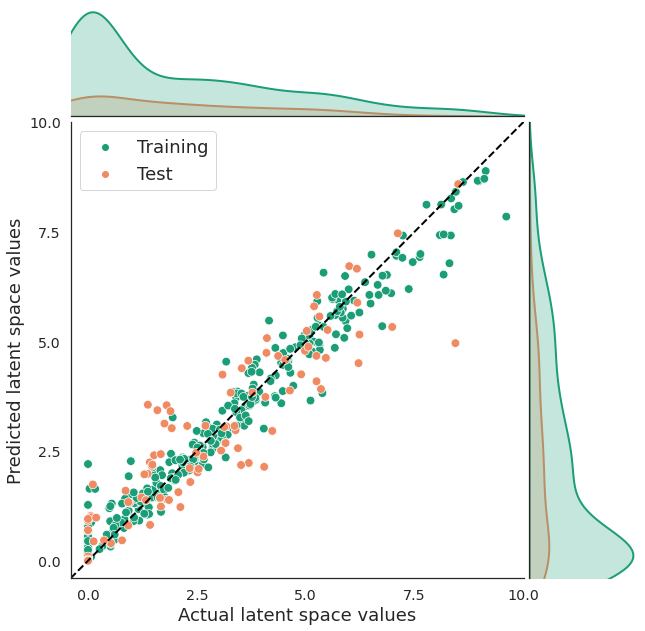

In [114]:
import seaborn as sns
sns.set(font_scale = 1.3)
sns.set_style('white')

plt.rcParams['axes.linewidth'] = 1.25

#ax = plt.gca()
#ax.set_xlim([-0.4, 20])
#ax.set_ylim([-0,4, 20])

g = sns.JointGrid(df1.iloc[:,0], df2.iloc[:,0], xlim=(-0.4,10), ylim=(-0.4,10),height=9,space = 0.05,ratio = 4,hue=df1.iloc[:,1],palette=['#1b9e77','#ef8a62'])

g.set_axis_labels('Actual latent space values','Predicted latent space values',fontsize=18)

g.plot_joint(sns.scatterplot,color = '#1b9e77',s = 75,alpha =1.0)

g.ax_joint.plot([-0.4,10], [-0.4,10], linestyle ='--',color='black', linewidth = 2.0)

g.ax_joint.locator_params(axis="x", nbins=5)
g.ax_joint.locator_params(axis="y", nbins=5)

g.ax_joint.legend(loc='best', frameon=True,fontsize = 18)

#g.ax_marg_y.set_ylim(-0.4,20)
#g.ax_marg_x.set_xlim(-0.4,20)

#.ax_marg_x.legend

g.plot_marginals(sns.kdeplot, fill=True,color='#1b9e77',linewidth = 2.0)

#plt.savefig("/home/tarak/Ayush/results/R2 score graphs/RF_with_CAE.pdf",bbox_inches='tight')

plt.show()

# UN-NORMALISATION

In [42]:
dataframe_x = scaler2_x.inverse_transform(dataframe_x)
dataframe_y = scaler2_y.inverse_transform(dataframe_y)

train_y = scaler2_y.inverse_transform(train_y)
predictions_on_trained_data = scaler2_y.inverse_transform(predictions_on_trained_data)
test_y = scaler2_y.inverse_transform(test_y)
predictions = scaler2_y.inverse_transform(predictions)

In [43]:
dataframe_x = scaler_x.inverse_transform(dataframe_x)
dataframe_y = scaler_y.inverse_transform(dataframe_y)

train_y = scaler_y.inverse_transform(train_y)
predictions_on_trained_data = scaler_y.inverse_transform(predictions_on_trained_data)
test_y = scaler_y.inverse_transform(test_y)
predictions = scaler_y.inverse_transform(predictions)

# RESIZING PREDICTIONS ON TEST DATA

In [44]:
predictions.resize(16,1,1,8)
predictions.shape

(16, 1, 1, 8)

In [45]:
%store predictions

Stored 'predictions' (ndarray)


In [46]:
test_y.shape

(16, 8)

In [47]:
#test_y.reshape(8,8)
dataframe_test_y = pd.DataFrame(test_y)
dataframe_test_y

,0,1,2,3,4,5,6,7
0,2.655463e-08,3.442884e+00,5.313842,0.0,1.593353,1.674423,2.483537e+00,0.0
1,5.460920e+00,-1.031619e-07,5.254953,0.0,4.073275,3.691249,1.227391e+00,0.0
2,2.651542e+00,2.121465e+00,6.212233,0.0,1.374281,3.176482,3.514854e+00,0.0
3,3.775093e+00,9.237225e-01,5.501054,0.0,1.419167,4.894078,3.056281e+00,0.0
4,4.982647e+00,-1.031619e-07,2.277762,0.0,5.247296,4.097417,6.533247e-02,0.0
5,9.541233e-01,1.911337e+00,3.682174,0.0,1.330593,4.107999,3.530999e+00,0.0
6,4.045355e+00,2.075034e+00,8.436440,0.0,3.089532,0.112626,2.350237e+00,0.0
7,5.022484e+00,-1.031619e-07,4.635832,0.0,6.184453,2.697393,7.814101e-01,0.0
8,5.060379e+00,-1.031619e-07,1.755489,0.0,5.349020,5.245183,7.503885e-02,0.0
9,3.277231e+00,2.334212e+00,7.113399,0.0,1.462676,1.813472,3.158813e+00,0.0


In [48]:
predictions.resize(16,8)
dataframe_predictions = pd.DataFrame(predictions)
dataframe_predictions

,0,1,2,3,4,5,6,7
0,0.677832,2.564515e+00,5.567249,0.0,3.431088,1.236076,2.037538e+00,0.0
1,4.622658,6.970129e-01,6.057133,0.0,3.733019,2.227839,1.442047e+00,0.0
2,2.375884,1.224152e+00,4.503957,0.0,3.556011,3.062485,2.181994e+00,0.0
3,3.832650,8.037761e-01,5.260376,0.0,2.241142,4.248923,2.510904e+00,0.0
4,4.784289,1.545235e-02,3.071679,0.0,4.089834,4.738422,1.023981e+00,0.0
5,1.321977,3.027790e+00,4.559774,0.0,1.380234,5.074454,4.387742e+00,0.0
6,2.140966,1.563546e+00,4.959295,0.0,4.242023,1.738847,1.795144e+00,0.0
7,5.238672,9.748376e-02,3.879680,0.0,5.881631,3.077630,4.648709e-01,0.0
8,4.876050,3.024874e-02,3.125484,0.0,3.913638,4.670074,9.932972e-01,0.0
9,3.831123,2.110886e+00,7.462186,0.0,2.160337,1.394892,2.682021e+00,0.0


# LATENT SPACE DIAGRAM

image = dataframe_predictions.iloc[0,:]
print(image.shape)
image = image.to_numpy()
image.resize(8,1,1)
#image = image*255
print(image.shape)
print(image)
data = Image.fromarray(image)
fig, ax = plt.subplots()
ax.axis("off")
plt.imshow(data)
plt.show()

# GETTING FULL DIMENSIONS FROM LATENT DIMENSIONS

In [49]:
model = load_model('AE.h5')

In [50]:
rdf = model.get_decoded.predict(predictions)
rdf.shape

AttributeError: 'Functional' object has no attribute 'get_decoded'